In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/brain_t.zip

Archive:  /content/drive/MyDrive/brain_t.zip
   creating: brain_t/glioma_tumor/
  inflating: brain_t/glioma_tumor/gg (1).jpg  
  inflating: brain_t/glioma_tumor/gg (10).jpg  
  inflating: brain_t/glioma_tumor/gg (100).jpg  
  inflating: brain_t/glioma_tumor/gg (101).jpg  
  inflating: brain_t/glioma_tumor/gg (102).jpg  
  inflating: brain_t/glioma_tumor/gg (103).jpg  
  inflating: brain_t/glioma_tumor/gg (104).jpg  
  inflating: brain_t/glioma_tumor/gg (105).jpg  
  inflating: brain_t/glioma_tumor/gg (106).jpg  
  inflating: brain_t/glioma_tumor/gg (107).jpg  
  inflating: brain_t/glioma_tumor/gg (108).jpg  
  inflating: brain_t/glioma_tumor/gg (109).jpg  
  inflating: brain_t/glioma_tumor/gg (11).jpg  
  inflating: brain_t/glioma_tumor/gg (110).jpg  
  inflating: brain_t/glioma_tumor/gg (111).jpg  
  inflating: brain_t/glioma_tumor/gg (112).jpg  
  inflating: brain_t/glioma_tumor/gg (113).jpg  
  inflating: brain_t/glioma_tumor/gg (114).jpg  
  inflating: brain_t/glioma_tumor/gg (115)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [4]:
Root_DIR="/content/brain_t"
number_of_images={}

for dir in os.listdir(Root_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(Root_DIR,dir)))

number_of_images.items()

dict_items([('pituitary_tumor', 901), ('glioma_tumor', 926), ('no_tumor', 396), ('meningioma_tumor', 937)])

In [5]:
len(os.listdir("/content/brain_t"))

4

#data split

In [6]:
def datafolder(p,split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(Root_DIR):
        os.makedirs("./"+p+"/"+dir)
        for img in np.random.choice(a=os.listdir(os.path.join(Root_DIR, dir)),
                                size = (math.floor(split*number_of_images[dir])),
                                replace=False):
      
          O=os.path.join(Root_DIR,dir,img) #path
          D=os.path.join("./"+p,dir)
          shutil.copy(O,D)
          os.remove(O)
  else:
    print(f"{p} folder already exists")

In [7]:
datafolder("train",0.7)

In [8]:
datafolder("test",0.15)

In [9]:
datafolder("val",0.15)

In [10]:
number_of_images={}

for dir in os.listdir(Root_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(Root_DIR,dir)))

number_of_images.items()

dict_items([('pituitary_tumor', 1), ('glioma_tumor', 2), ('no_tumor', 1), ('meningioma_tumor', 2)])

In [11]:
pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.9 MB/s eta 0:00:00


#Model Build

In [12]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAveragePooling2D
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
import keras
from keras.backend import flatten
from keras.engine import sequential

In [125]:
#CNN Model

model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(244,244,3),padding='Same'))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.20))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
#model.add(Dropout(rate=0.20))
model.add(Dense(units=4,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 244, 244, 16)      448       
                                                                 
 conv2d_18 (Conv2D)          (None, 242, 242, 36)      5220      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 121, 121, 36)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 119, 119, 64)      20800     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 57, 57, 128)      

In [126]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

prepering our data using Data generator

In [127]:
from keras.preprocessing.image import ImageDataGenerator

In [128]:
def preprocessingImages1(path):
  """
  input:Path
  output: pre processed image
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(244,244),batch_size=32,class_mode="categorical")

  return image

In [129]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 2210 images belonging to 4 classes.


In [130]:
train_data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [131]:
def preprocessingImages2(path):
  """
  input:Path
  output: pre processed image
  """
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(244,244),batch_size=32,class_mode="categorical")

  return image

In [132]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 472 images belonging to 4 classes.


In [133]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 472 images belonging to 4 classes.


In [134]:
# early stopping and model checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping

# early stopping
es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')

# model checkpoint
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",save_best_only=True,verbose=1,mode='auto')

cd=[es,mc]

#Model traning

In [135]:
from keras import callbacks
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=10,
                       verbose=1,
                       validation_data=val_data,
                       callbacks=cd)


<ipython-input-135-62126f56c7ec>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs=model.fit_generator(generator=train_data,


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 1.5529 - accuracy: 0.2930
Epoch 1: val_accuracy improved from -inf to 0.29661, saving model to ./bestmodel.h5
8/8 [==============================] - 9s 893ms/step - loss: 1.5529 - accuracy: 0.2930 - val_loss: 1.3688 - val_accuracy: 0.2966
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 1.3429 - accuracy: 0.3281
Epoch 2: val_accuracy did not improve from 0.29661
8/8 [==============================] - 6s 789ms/step - loss: 1.3429 - accuracy: 0.3281 - val_loss: 1.3478 - val_accuracy: 0.2924
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 1.3354 - accuracy: 0.4062
Epoch 3: val_accuracy improved from 0.29661 to 0.46186, saving model to ./bestmodel.h5
8/8 [==============================] - 8s 1s/step - loss: 1.3354 - accuracy: 0.4062 - val_loss: 1.2956 - val_accuracy: 0.4619
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 1.3004 - accuracy: 0.4492
Epoch 4: val_accuracy did 

In [136]:
# model graphical inrepretation

h=hs.history 
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

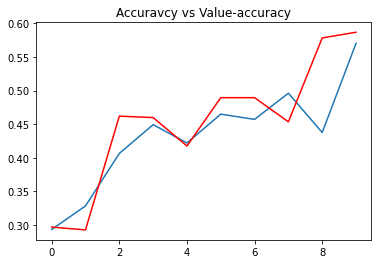

In [137]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")

plt.title("Accuravcy vs Value-accuracy")
plt.show()

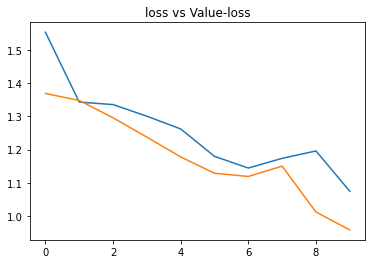

In [138]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])

plt.title("loss vs Value-loss")
plt.show()

In [ ]:
# Model Accuracy 

In [139]:
from keras.models import load_model

model=load_model("/content/bestmodel.h5")
# put the value from the best model 

In [140]:
acc =model.evaluate_generator(test_data)[1]
print(f"the accuracy of our model is {acc*100}%")

<ipython-input-140-c767bc7500c8>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc =model.evaluate_generator(test_data)[1]


the accuracy of our model is 61.01694703102112%


In [141]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [145]:
import numpy as np
import keras.utils as image
test_image = image.load_img('/content/drive/MyDrive/brain_t/brain_t/pituitary_tumor/image(1).jpg', target_size = (244,244))
img = np.array(test_image)
print(img.shape)
img = img / 255.0
img = img.reshape(1,244,244,3)
label = model.predict(img)
y_pred=np.argmax(label, axis=1) #greater than 0.50 on scale 0 to 1
print(y_pred)

(244, 244, 3)
1/1 [==============================] - 0s 34ms/step
[3]


Model Training 

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import flatten, dense
from keras.models import Model, load_Model 
from keras.application.mobilenet import MobileNet
import keras

ImportError: ignored

In [ ]:
base_model = MobileNet(input_shape=(224,224,3), include_top= False)

In [ ]:
For layer in basemodel.layers:
layer.trainable = False


In [ ]:
base_model.summary()

In [ ]:
x = Flatten()(base_model.output)
x= Dense(units=1,activation='sigmoid')(x)

model=Model(base_model.input,x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [ ]:
# callback 

from keras.callbacks import ModelCheckpoint,Earlystopping
mc= ModelCheckpoint(filepath="bestmodel.h5",monitor="val_accuracy", verbose=1,save_best_only=True)

# Early Stopping 
es=Earlystopping()

In [ ]:
model.fit_generator(monitor="val_accuracy",min_delta=0.01, patience=3,verbose =1)

cb = [mc,es]


In [ ]:
hist =model.fit_generator(train_data,
                          steps_per_epoch=8,
                          epochs=30,
                          validation_data=val_data, 
                          validation_steps=16,callbacks=cb)

In [ ]:
# load the best model

model = load_model()
# Above put the path from the  bestmodel file 

In [ ]:
acc = model.evaluateP_generator(test_data)[]

print(f"our model accuracy is {acc*100}% ")

In [ ]:
h =hist.history

h.keys()


In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= 'red')
plt.title("Accuracy vs Val-Accuracy")
plt.show()


In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= 'red')
plt.title("Loss vs Val-Loss")
plt.show()


In [ ]:
from keras.preprocessing import image

In [ ]:
# path for the image to see if it predicts correct class

path=""
img = image.load_img(path, target_size=(224,224))

i = input.img_to_array(img)
i = preprocess_input(i)
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  Print("This MRI is Having a Tumor")
else
print("This MRi is not having a tumor")

# to display the image

plt.imshow(input_arr[0])
plt.title("input_imag")
plt.show()
